## RAMP on qualitative and quantitative non-invasive monitoring of anti-cancer drugs 


15 Dec, 2016  
ZHOU Peikun

## Data Analysis

In [3]:
%matplotlib inline
import os
import glob
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('train.csv')

y_df = data[['molecule', 'concentration']]
X_df = data.drop(['molecule', 'concentration'], axis=1)
spectra = X_df['spectra'].values                                        
spectra = np.array([np.array(dd[1:-1].split(',')).astype(float) for dd in spectra])    
X_df['spectra'] = spectra.tolist()

# Loading wavenumbers
freqs = pd.read_csv('freq.csv')
freqs = freqs['freqs'].values

In [4]:
# Target for classification, 分子
molecule = y_df['molecule'].values
# Target for regression， 浓度
concentration = y_df['concentration'].values
# "Raw" features， 光谱
X = spectra

In [5]:
np.unique(concentration)

array([  300,   400,   500,   600,   800,  1000,  1200,  1400,  1500,
        1600,  2000,  3000,  4000,  5000,  6000,  7000,  8000,  9000,
       10000, 20000, 25000])

In [6]:
spectra

array([[ 0.0152963,  0.0152944,  0.0153142, ...,  0.017305 ,  0.0170706,
         0.0172018],
       [ 0.0143634,  0.0143292,  0.0143999, ...,  0.018519 ,  0.0186104,
         0.0187633],
       [ 0.0163027,  0.0161848,  0.0163573, ...,  0.017772 ,  0.0179032,
         0.0175998],
       ..., 
       [ 0.019496 ,  0.0195301,  0.0193758, ...,  0.0160981,  0.0162023,
         0.0161263],
       [ 0.0173912,  0.0178033,  0.0173978, ...,  0.0170894,  0.0170807,
         0.0169723],
       [ 0.0167408,  0.016743 ,  0.0165654, ...,  0.0174375,  0.0173088,
         0.0173755]])

In [7]:
spectra.T.shape

(1866, 999)

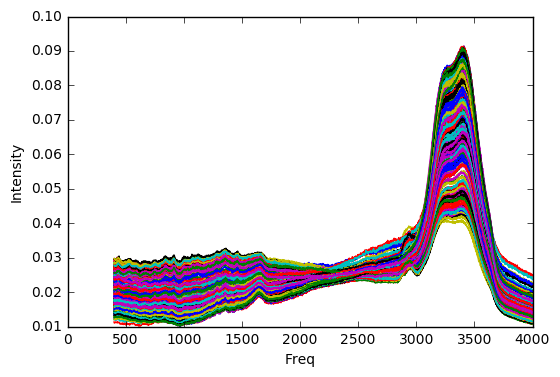

In [8]:
# We are using array.T to transform the matrix to meet freqs' dimension, each freq is corresponde to 999 spectra
plt.plot(freqs, spectra.T)
plt.xlabel('Freq')
plt.ylabel('Intensity')

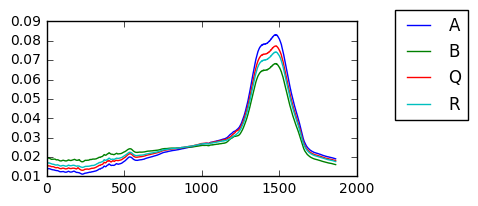

In [9]:
plt.rcParams['figure.figsize'] = (4, 2)
# Mean Raman spectra for each type of molecule
for mol in np.unique(molecule):
    plt.plot(np.mean(X[molecule == mol, :], axis=0), label="%s" % mol)

plt.legend(bbox_to_anchor=(1.2, 1),
           bbox_transform=plt.gcf().transFigure);

We already know that there are 999 samples and 1866 features, and some of them may have no positive work for results, so we need to clean these data.


### PCA

In class classifier, we use pepline and I considered PCA at the first. I think the value of n_components is good when PCA could capture kinds of features. I tried n_components from 10 to 1000, and found that the result(error and combined) will be better at the interval [10, 100], the result perform not well beyond the interval. So, I select n_components = 20. 

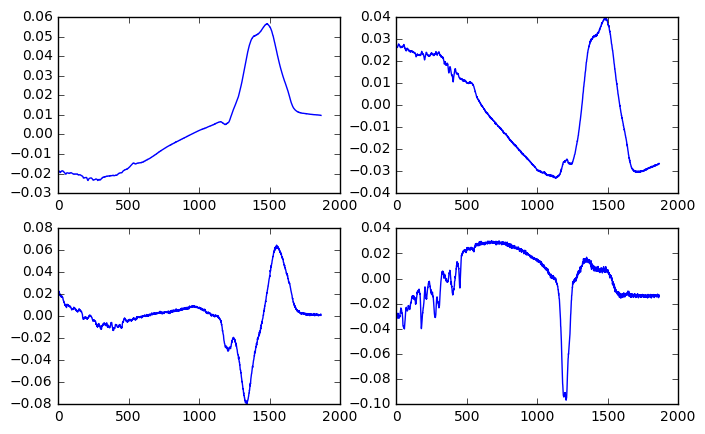

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
X_reduced = pca.fit_transform(X)
plt.subplot(2, 2, 1)
plt.plot(-pca.components_[0])
plt.subplot(2, 2, 2)
plt.plot(-pca.components_[1])
plt.subplot(2, 2, 3)
plt.plot(-pca.components_[2])
plt.subplot(2, 2, 4)
plt.plot(-pca.components_[3])
plt.rcParams['figure.figsize'] = (6, 6)

According the graph, the first component is the average sprectum

## Frequence